## Assignment 3: MFE python

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline

In [2]:
data=pd.read_csv("data/hw3.csv")

In [3]:
data.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [4]:
data.describe()

,open,high,low,close,volume,volumeUSD
count,2667.000000,2163.000000,2378.000000,2.531000e+03,2.667000e+03,0.0
mean,7064.250761,7009.354391,6963.685381,2.307774e+04,4.794219e+05,NaN
std,16866.246913,16878.982545,16683.896987,2.813898e+05,1.651197e+06,NaN
min,1.000200,1.000400,1.000200,1.000500e-02,6.717800e+01,NaN
25%,5.396500,5.052950,5.226625,5.341300e+00,1.324246e+03,NaN
50%,190.387000,192.373000,187.646000,1.900500e+02,1.886909e+04,NaN
75%,284.045000,284.160000,282.607500,1.706660e+03,1.059882e+05,NaN
max,58664.400000,58783.160000,58445.530000,5.688883e+06,3.282850e+07,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


### We can see that we have quite a few nulls in the high, low and close features.

In [6]:
data["token"].value_counts()

BTC                                   323
COMP                                  322
CRV                                   318
SOL                                   318
USDT                                  314
AAVE                                  312
UNI                                   312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">SOL</span>      16
<span name="tokenName">AAVE</span>     16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

### We also have badly formatted token names.

In [7]:
data.duplicated().sum()

307

### And we also have duplicates...

In [8]:
import math

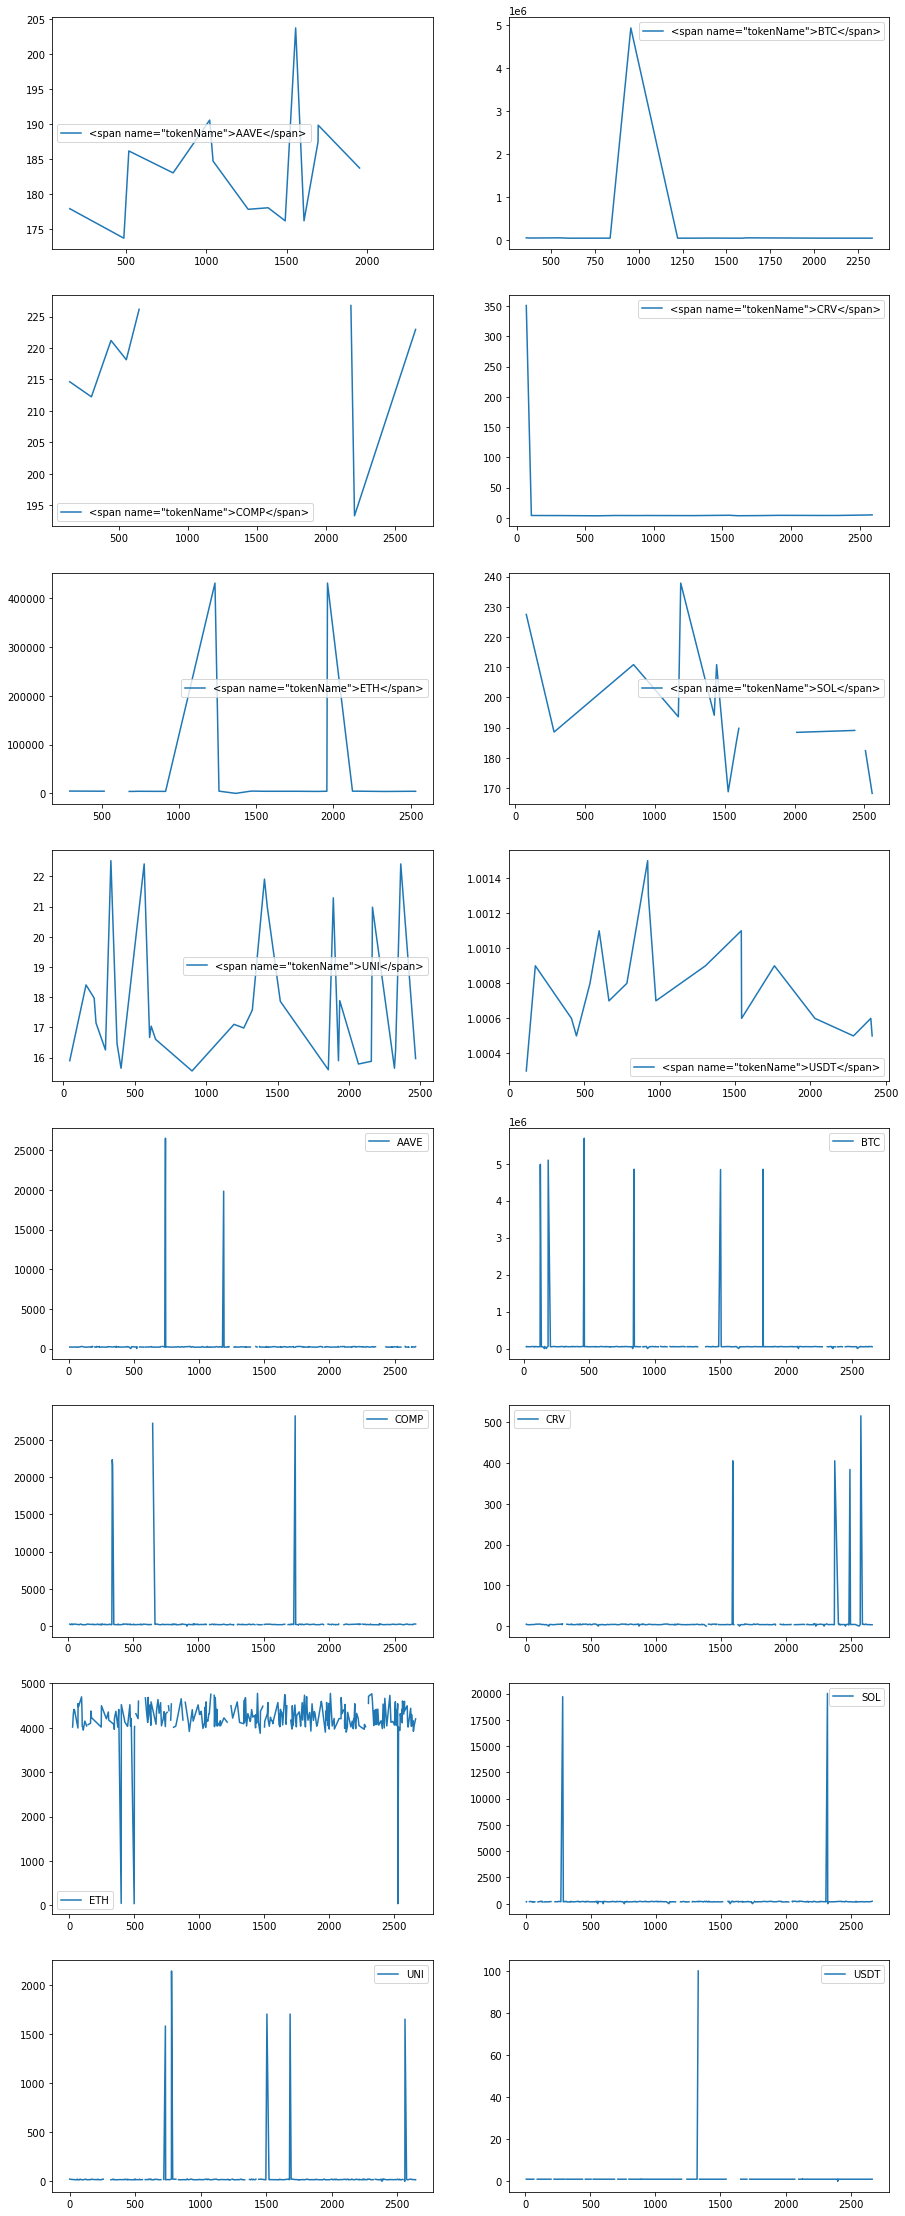

In [9]:
tokens_in_data = data.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_data.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_data.size / 2)))

idx = 0
for label, data_token in data[['token', 'close']].groupby('token'):
    data_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

### We clearly have many outliers and even some missing data

In [10]:
#Let's first drop the duplicates
data = data.drop_duplicates()

In [11]:
data.loc[data['token'].str.contains('<span name="tokenName">'), 'token'] = data.loc[data['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.|\n)*?<\/span>')


In [12]:
data["token"].value_counts()

COMP    286
BTC     283
SOL     281
AAVE    280
CRV     279
USDT    278
ETH     270
UNI     270
Name: token, dtype: int64

In [13]:
tokens=["COMP", "BTC", "SOL", "AAVE", "CRV", "USDT", "UNI", "ETH"]

In [14]:
def get_data(token):
    return data.loc[data['token'] == token]

In [15]:
dfs = [
    (lambda x: x.assign(chain=np.where(x.token.isin(['ETH', 'AAVE', 'COMP']), np.full(x.shape[0], 'ETH'), x.token)))(get_data(token)) 
    for token in tokens
]

In [17]:
df = pd.concat(get_data(token) for token in tokens)

In [18]:
df.set_index('ts', inplace=True)

In [122]:
df

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-03 06:00:00,270.21,NaN,268.67,271.24,316.088000,NaN,COMP,ETH
2021-12-10 20:00:00,188.87,190.39,NaN,190.12,696.480000,NaN,COMP,ETH
2021-12-01 16:00:00,285.05,286.53,283.01,284.03,789.216000,NaN,COMP,ETH
2021-12-07 11:00:00,229.18,229.36,226.67,228.41,316.285000,NaN,COMP,ETH
2021-12-04 02:00:00,248.24,NaN,245.85,250.32,1266.836000,NaN,COMP,ETH
...,...,...,...,...,...,...,...,...
2021-12-11 15:00:00,4013.20,4038.13,3993.30,4031.02,3285.299959,NaN,ETH,ETH
2021-12-08 03:00:00,4316.17,4339.90,4291.61,4296.24,4437.676558,NaN,ETH,ETH
2021-12-06 09:00:00,4077.47,4155.33,3994.00,4051.40,17311.833273,NaN,ETH,ETH


In [19]:
for i in range (len(tokens)):
    dfs[i].set_index("ts", inplace=True)
    dfs[i].sort_index(inplace=True)

In [20]:
df=pd.concat(dfs[i] for i in range (len(tokens)))

In [21]:
df

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-01 00:00:00,280.59,281.40,278.30,278.70,207.849000,NaN,COMP,ETH
2021-12-01 01:00:00,278.65,283.80,276.36,283.44,817.668000,NaN,COMP,ETH
2021-12-01 02:00:00,283.20,NaN,280.61,281.29,254.330000,NaN,COMP,ETH
2021-12-01 03:00:00,281.25,283.22,279.90,283.09,393.771000,NaN,COMP,ETH
2021-12-01 04:00:00,283.10,284.16,282.60,283.73,489.120000,NaN,COMP,ETH
...,...,...,...,...,...,...,...,...
2021-12-13 02:00:00,4070.58,4070.58,3961.85,3970.92,18723.615566,NaN,ETH,ETH
2021-12-13 03:00:00,3970.92,3999.90,3954.27,3984.29,8106.286351,NaN,ETH,ETH
2021-12-13 04:00:00,3984.29,4012.00,NaN,3998.87,4939.751497,NaN,ETH,ETH


In [22]:
for i in range (len(tokens)):
    dfs[i]['high'].fillna(method='ffill', inplace=True)
    dfs[i]['low'].fillna(method='ffill', inplace=True)
    dfs[i]['close'].fillna(method='ffill', inplace=True)

In [23]:
df=pd.concat(dfs[i] for i in range (len(tokens)))

In [24]:
df

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-01 00:00:00,280.59,281.40,278.30,278.70,207.849000,NaN,COMP,ETH
2021-12-01 01:00:00,278.65,283.80,276.36,283.44,817.668000,NaN,COMP,ETH
2021-12-01 02:00:00,283.20,283.80,280.61,281.29,254.330000,NaN,COMP,ETH
2021-12-01 03:00:00,281.25,283.22,279.90,283.09,393.771000,NaN,COMP,ETH
2021-12-01 04:00:00,283.10,284.16,282.60,283.73,489.120000,NaN,COMP,ETH
...,...,...,...,...,...,...,...,...
2021-12-13 02:00:00,4070.58,4070.58,3961.85,3970.92,18723.615566,NaN,ETH,ETH
2021-12-13 03:00:00,3970.92,3999.90,3954.27,3984.29,8106.286351,NaN,ETH,ETH
2021-12-13 04:00:00,3984.29,4012.00,3954.27,3998.87,4939.751497,NaN,ETH,ETH


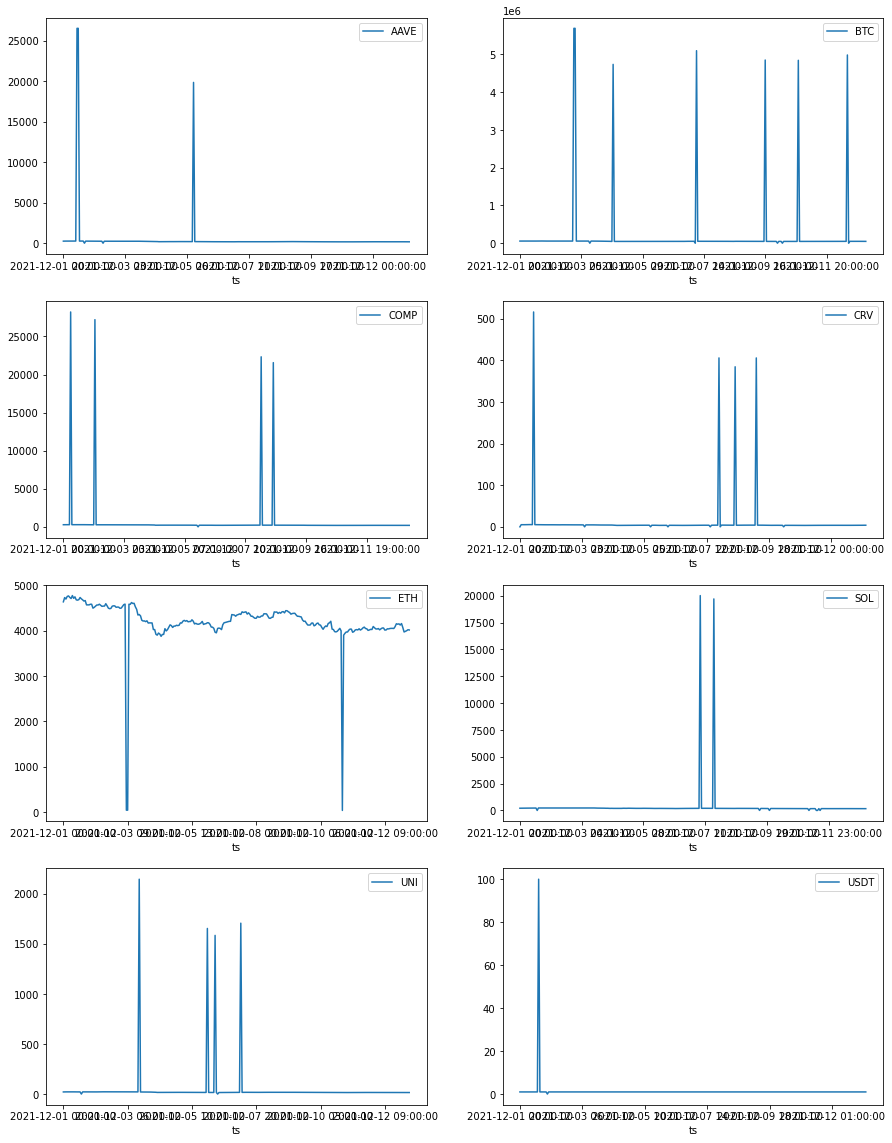

In [25]:
tokens_in_data = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_data.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_data.size / 2)))

idx = 0
for label, data_token in df[['token', 'close']].groupby('token'):
    data_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [26]:
df.loc[abs(df.close / df.open) >= 2, 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])


In [27]:
df.loc[df.close / df.open <= 1/2, 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])


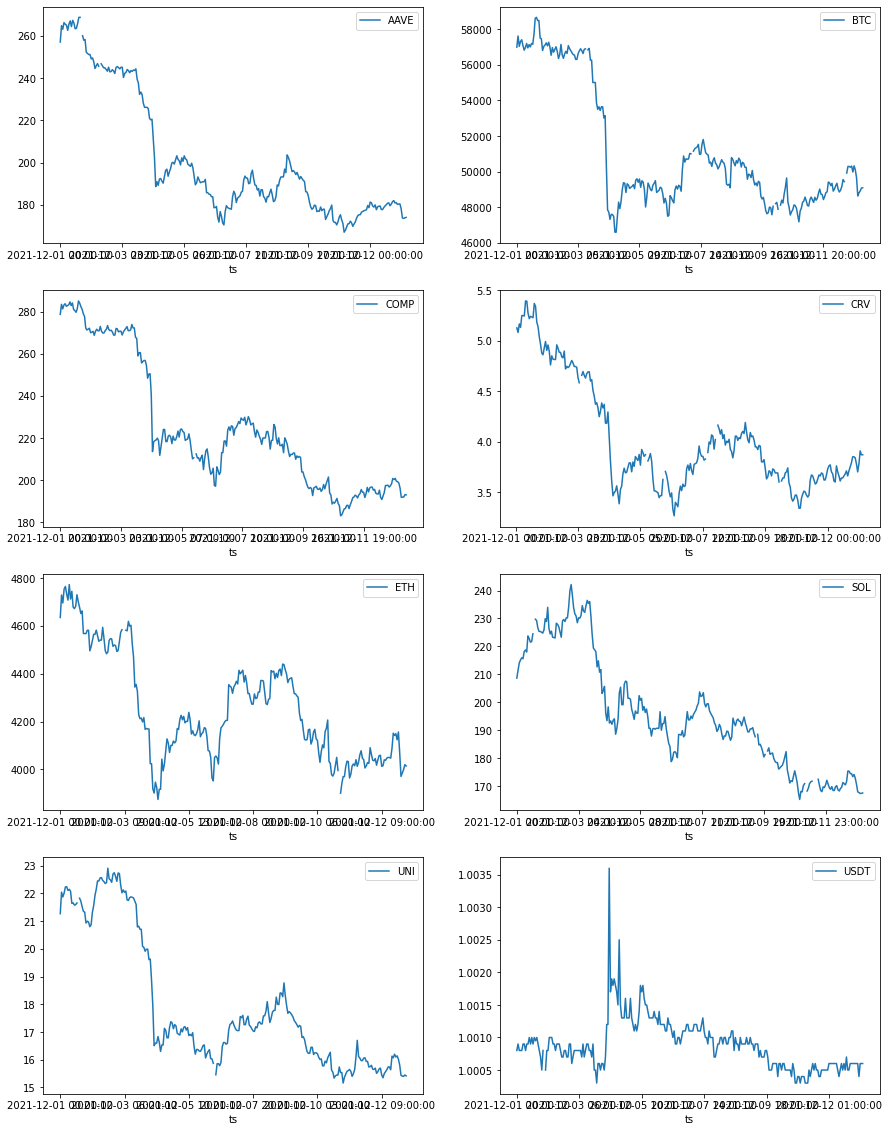

In [28]:
tokens_in_data = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_data.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_data.size / 2)))

idx = 0
for label, data_token in df[['token', 'close']].groupby('token'):
    data_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2227 entries, 2021-12-01 00:00:00 to 2021-12-13 06:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2227 non-null   float64
 1   high       2226 non-null   float64
 2   low        2227 non-null   float64
 3   close      2199 non-null   float64
 4   volume     2227 non-null   float64
 5   volumeUSD  0 non-null      float64
 6   token      2227 non-null   object 
 7   chain      2227 non-null   object 
dtypes: float64(6), object(2)
memory usage: 156.6+ KB


In [34]:
df['close'].fillna(method="ffill", inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2227 entries, 2021-12-01 00:00:00 to 2021-12-13 06:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2227 non-null   float64
 1   high       2226 non-null   float64
 2   low        2227 non-null   float64
 3   close      2227 non-null   float64
 4   volume     2227 non-null   float64
 5   volumeUSD  0 non-null      float64
 6   token      2227 non-null   object 
 7   chain      2227 non-null   object 
dtypes: float64(6), object(2)
memory usage: 156.6+ KB


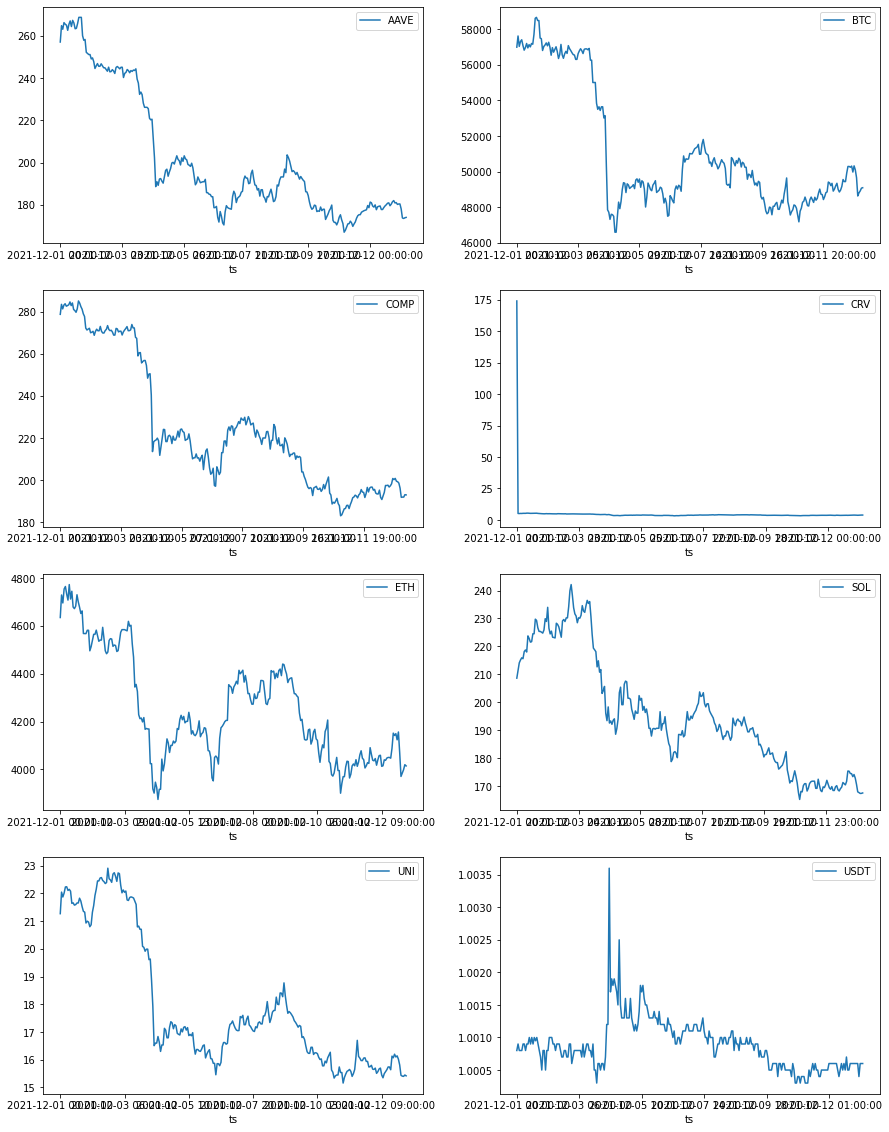

In [36]:
tokens_in_data = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_data.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_data.size / 2)))

idx = 0
for label, data_token in df[['token', 'close']].groupby('token'):
    data_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [37]:
df.loc[df.high / df.open >= 2, 'high'] = 0.0

In [38]:
df['high'].fillna(method="ffill", inplace=True)

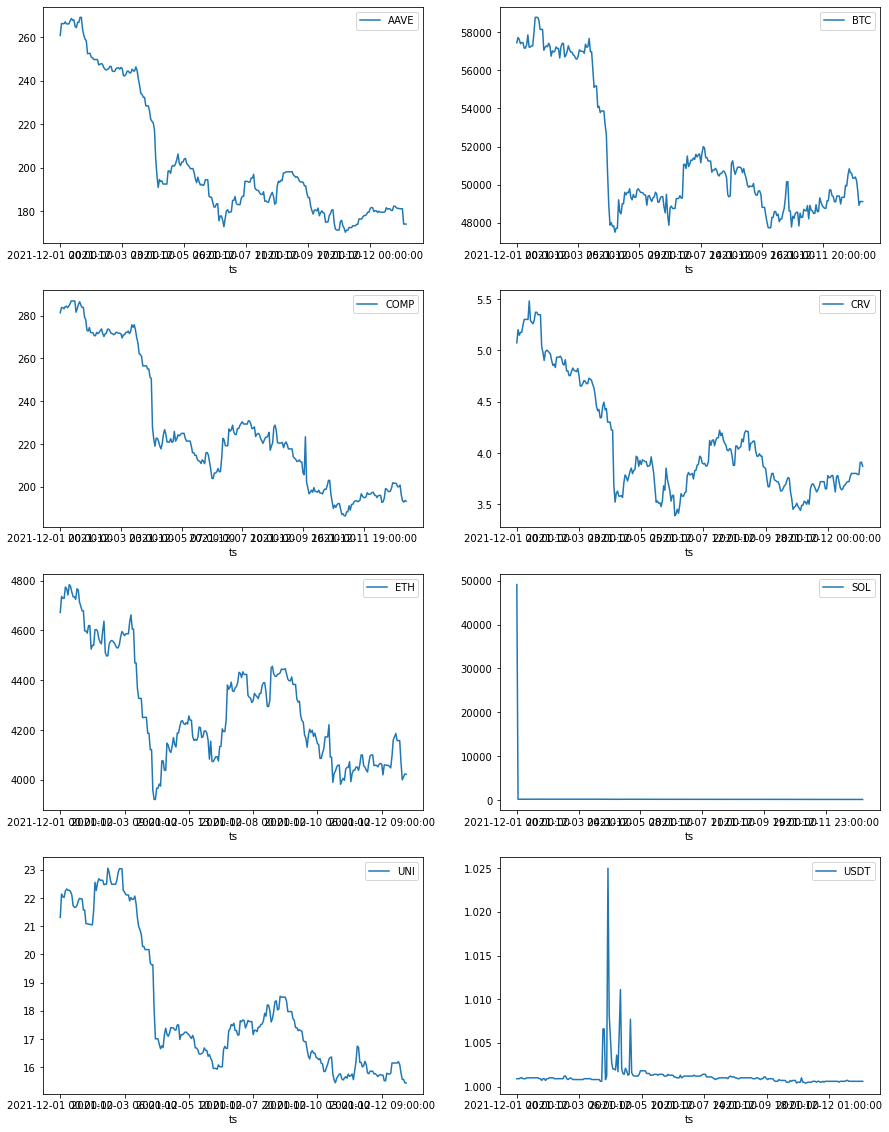

In [39]:
tokens_in_data = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_data.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_data.size / 2)))

idx = 0
for label, data_token in df[['token', 'high']].groupby('token'):
    data_token['high'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

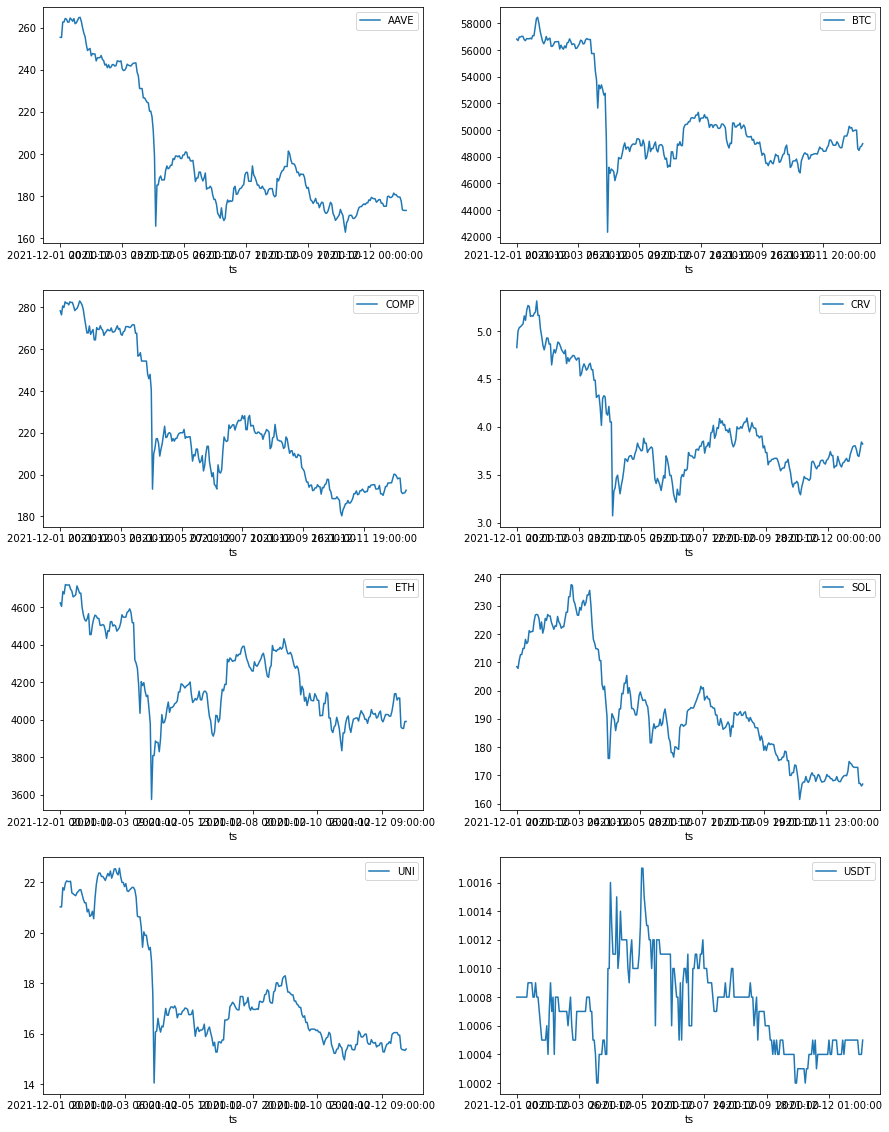

In [40]:
tokens_in_data = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_data.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_data.size / 2)))

idx = 0
for label, data_token in df[['token', 'low']].groupby('token'):
    data_token['low'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [41]:
df["volumeUSD"]=df["volume"]*df["close"]

In [42]:
df

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-01 00:00:00,280.59,281.40,278.30,278.70,207.849000,5.792752e+04,COMP,ETH
2021-12-01 01:00:00,278.65,283.80,276.36,283.44,817.668000,2.317598e+05,COMP,ETH
2021-12-01 02:00:00,283.20,283.80,280.61,281.29,254.330000,7.154049e+04,COMP,ETH
2021-12-01 03:00:00,281.25,283.22,279.90,283.09,393.771000,1.114726e+05,COMP,ETH
2021-12-01 04:00:00,283.10,284.16,282.60,283.73,489.120000,1.387780e+05,COMP,ETH
...,...,...,...,...,...,...,...,...
2021-12-13 02:00:00,4070.58,4070.58,3961.85,3970.92,18723.615566,7.434998e+07,ETH,ETH
2021-12-13 03:00:00,3970.92,3999.90,3954.27,3984.29,8106.286351,3.229780e+07,ETH,ETH
2021-12-13 04:00:00,3984.29,4012.00,3954.27,3998.87,4939.751497,1.975342e+07,ETH,ETH


In [43]:
df.groupby(['chain', 'token'])['volumeUSD'].sum().to_frame()

volumeUSD
chain token              
BTC   BTC    1.055949e+10
CRV   CRV    3.495660e+08
ETH   AAVE   1.363967e+08
      COMP   6.993517e+07
      ETH    1.178603e+10
SOL   SOL    3.912080e+09
UNI   UNI    2.660043e+08
USDT  USDT   9.692535e+08